# Итераторы и генераторы. Перегрузка операторов. Исключения.

## Исключения

In [29]:
x = int(input())
print(1 / x)

0


ZeroDivisionError: division by zero

Как обработать ошибку?

In [19]:
try:
    x = int(input())
    print(1 / x)
except ZeroDivisionError:
    print('Вы точно не делаете ничего незаконного?')

0
Вы точно не делаете ничего незаконного?


А если ввести не число?

In [30]:
try:
    x = int(input())
    print(1 / x)
except ZeroDivisionError:
    print('Вы точно не делаете ничего незаконного?')

аывалывао


ValueError: invalid literal for int() with base 10: 'аывалывао'

In [23]:
try:
    x = int(input())
    print(1 / x)
except (ZeroDivisionError, ValueError):
    print('Вы точно не делаете ничего незаконного?')

sdf
Вы точно не делаете ничего незаконного?


Или так:

In [25]:
try:
    x = int(input())
    print(1 / x)
except ValueError:
    print('Это не число')
except ZeroDivisionError:
    print('На ноль делить нельзя :(')

sdf
Это не число


Или даже так! (но это не очень хорошая идея)

In [32]:
try:
    x = int(input())
    print(1 / x)
except:
    print('Вы точно не делаете ничего незаконного?')

fjsdkfjsldf
Вы точно не делаете ничего незаконного?


Мы можем сами выбрасывать исключения:

In [41]:
def greet(user_name):
    if not user_name:
        raise ValueError('Can`t greet user without name')
        
    return 'Hello ' + user_name

In [42]:
greet('')

ValueError: Can`t greet user without name

In [45]:
print(greet('world'))

Hello world


Или создавать собственные:

In [46]:
class MySuperException(Exception):
    pass

class ChildOfMySuperException(MySuperException):
    pass

Что будет выведено в двух следующих ячейках? Почему?

In [ ]:
try:
    raise ChildOfMySuperException()
except ChildOfMySuperException:
    print('Caught ChildOfMySuperException')
except MySuperException:
    print('Caught MySuperException')

In [ ]:
try:
    raise ChildOfMySuperException()
except MySuperException:
    print('Caught MySuperException')
except ChildOfMySuperException:
    print('Caught ChildOfMySuperException')

А если мы хотим, чтобы какой-то код выполнился после блока try и после обработки исключения (если оно есть?)

Конечно, можно попробовать так:

In [70]:
def f(x):
    try:
        print(1 / x)
    except ZeroDivisionError:
        print('Can`t divide by zero')
    
    print('Exiting f(%s)' % x)

f(1)

1.0
Exiting f(1)


А если функция будет выглядеть так?

In [79]:
def f(x):
    try:
        return 1 / x
    except ZeroDivisionError:
        print('Can`t divide by zero')
        return None
    
    print('Exiting f(%s)' % x)


In [80]:
print(f(-1))

-1.0


In [81]:
print(f(0))

Can`t divide by zero
None


Используем блок finally: 

In [82]:
def f(x):
    try:
        return 1 / x
    except ZeroDivisionError:
        print('Can`t divide by zero')
        return None
    finally:
        print('Exiting f(%s)' % x)


In [83]:
print(f(-1))

Exiting f(-1)
-1.0


In [84]:
print(f(0))

Can`t divide by zero
Exiting f(0)
None


Задание на подумать: 

1) Что будет, если код в секции except/finally выбросит исключение?

2) Что вернёт функция, если в блоке try и finally будут оператор return?

Более полезное применение `finally`:

In [95]:
f = open('seminar4.ipynb', 'rb')

try:
    first_ten_bytes = f.read()[:10]
except:
    print('Something very bad happened')
finally:
    f.close()

In [97]:
f.closed

True

Кстати, работу с файлами упрощает конструкция `with`, которая в данном случае сама закроет файл, даже если код внутри блока выбросит исключение:

In [100]:
with open('seminar4.ipynb', 'rb') as f:
    print('Size of this notebook is %d bytes' % len(f.read()))

Size of this notebook is 16504 bytes


## Итераторы

![](https://nvie.com/img/relationships.png)

**Вкратце:**
+ итератор - есть метод ***\_\_next\_\_()***, лениво вычисляет и возвращает следующее значение
+ итерируемый объект - есть метод ***\_\_iter\_\_()*** который возвращает итератор
+ генератор - функция с ***yield*** или выражение в круглых скобках `(i for i in range(x))`
+ контейнер - ***list, set, dict*** и т.д., все значения хранятся в памяти

In [106]:
some_list = [i ** 2 for i in range(7)] # list comprehension

In [108]:
for i in some_list:
    print(i)

0
1
4
9
16
25
36


Наверное, интерпретатор понимает, как пройтись по списку. А как он это делает?

In [111]:
iterator = iter(some_list)

while True:
    print(next(iterator))

0
1
4
9
16
25
36


StopIteration: 

А если хотим сделать такое же для своих классов?

In [122]:
# класс одновременно iterable и iterator - частое явление в питоне
class MyIntRange:
    def __init__(self, min_value, max_value):
        self.min_value = min_value
        self.max_value = max_value
        self.current_value = min_value - 1
    
    def __next__(self): # для работы метода next() - итератор
        if self.current_value >= self.max_value:
            raise StopIteration()
        
        self.current_value += 1
        return self.current_value
    
    def __iter__(self): # для работы метода iter() - итерируемый объект
        return self

In [123]:
for i in MyIntRange(0, 7):
    print(i)

0
1
2
3
4
5
6
7


Итераторы позволяют единообразно обращаться к разным коллекциям. 

In [129]:
for i in set([1, 2, 3, 4, 1, 2, 3, 4]):
    print(i)

1
2
3
4


In [130]:
for key in dict(x=1, y=2, z=3):
    print(key)

x
y
z


## Генераторы

Чтобы не писать простыни с `__next__` и  `__item__`, существуют генераторы.

In [134]:
# generator function
def my_int_generator(a, b):
    while a <= b:
        yield a
        a += 1

In [135]:
for i in my_int_generator(0, 7):
    print(i)

0
1
2
3
4
5
6
7


`my_int_generator(0, 7)`  вернёт нам объект-генератор. Весь код сразу исполняться не будет.

In [149]:
def my_int_generator(a, b):
    print('Enter')
    while a <= b:
        print('Yielding %d' % a)
        yield a
        a += 1
    print('Exit')

In [153]:
generator = my_int_generator(0, 1)
print(type(generator))
print('А теперь попробуем пройтись по итератору')
print(next(generator))
print(next(generator))
print(next(generator))

<class 'generator'>
А теперь попробуем пройтись по итератору
Enter
Yielding 0
0
Yielding 1
1
Exit


StopIteration: 

In [152]:
for i in my_int_generator(0, 2):
    print(i)

Enter
Yielding 0
0
Yielding 1
1
Yielding 2
2
Exit


In [2]:
# generator expression 
exp_generator = (i for i in range(7))
print(next(exp_generator))
print(next(exp_generator))

0
1


Код функции-генератора приостанавливает выполнение на инструкции yield и продолжает исполнение, когда мы запрашиваем следующий элемент.

Итераторы (и генераторы) полезны, например, когда мы обрабатываем очень большой файл или скачиваем большую таблицу из базы данных. Если данные целиком не помещаются в память, приходится считывать и обрабатывать их кусками, что удобно делать с помощью итераторов.

## Перегрузка операторов

In [172]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [173]:
some_point = Point(0, 1)
another_point = Point(0, 1)
print(some_point == another_point)

False


Ну куда это годится? Научим экземпляры класса сравнивать себя с другими объектами!

In [168]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y

In [169]:
some_point = Point(0, 1)
another_point = Point(0, 1)
print(some_point == another_point)

True


Можно перегружать и другие операторы сравнения [(см. тут)](https://docs.python.org/3/reference/datamodel.html#object.__lt__)

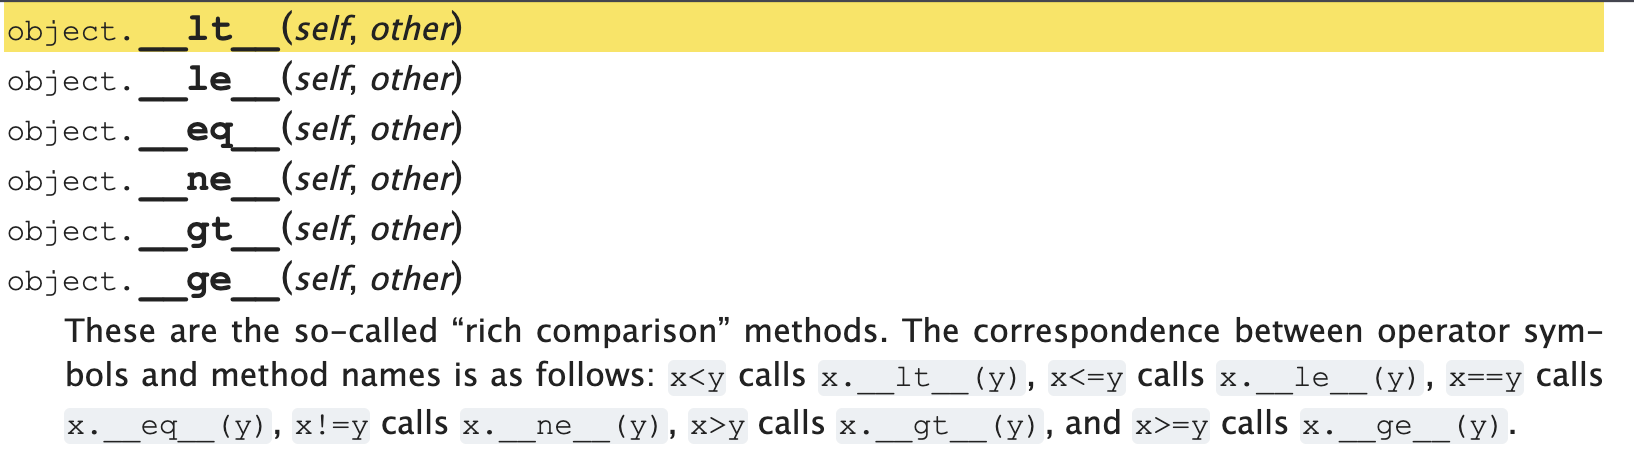

Или даже арифметические операторы:

In [166]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y
    
    def __add__(self, other):
        return Point(self.x + other.x, self.y + other.y)
    
    def __repr__(self):
        return '<Point(%s, %s)>' % (self.x, self.y)

In [167]:
Point(1, 2) + Point(-1, 2)

<Point(0, 4)>

[(источник)](https://docs.python.org/3/reference/datamodel.html#emulating-numeric-types)

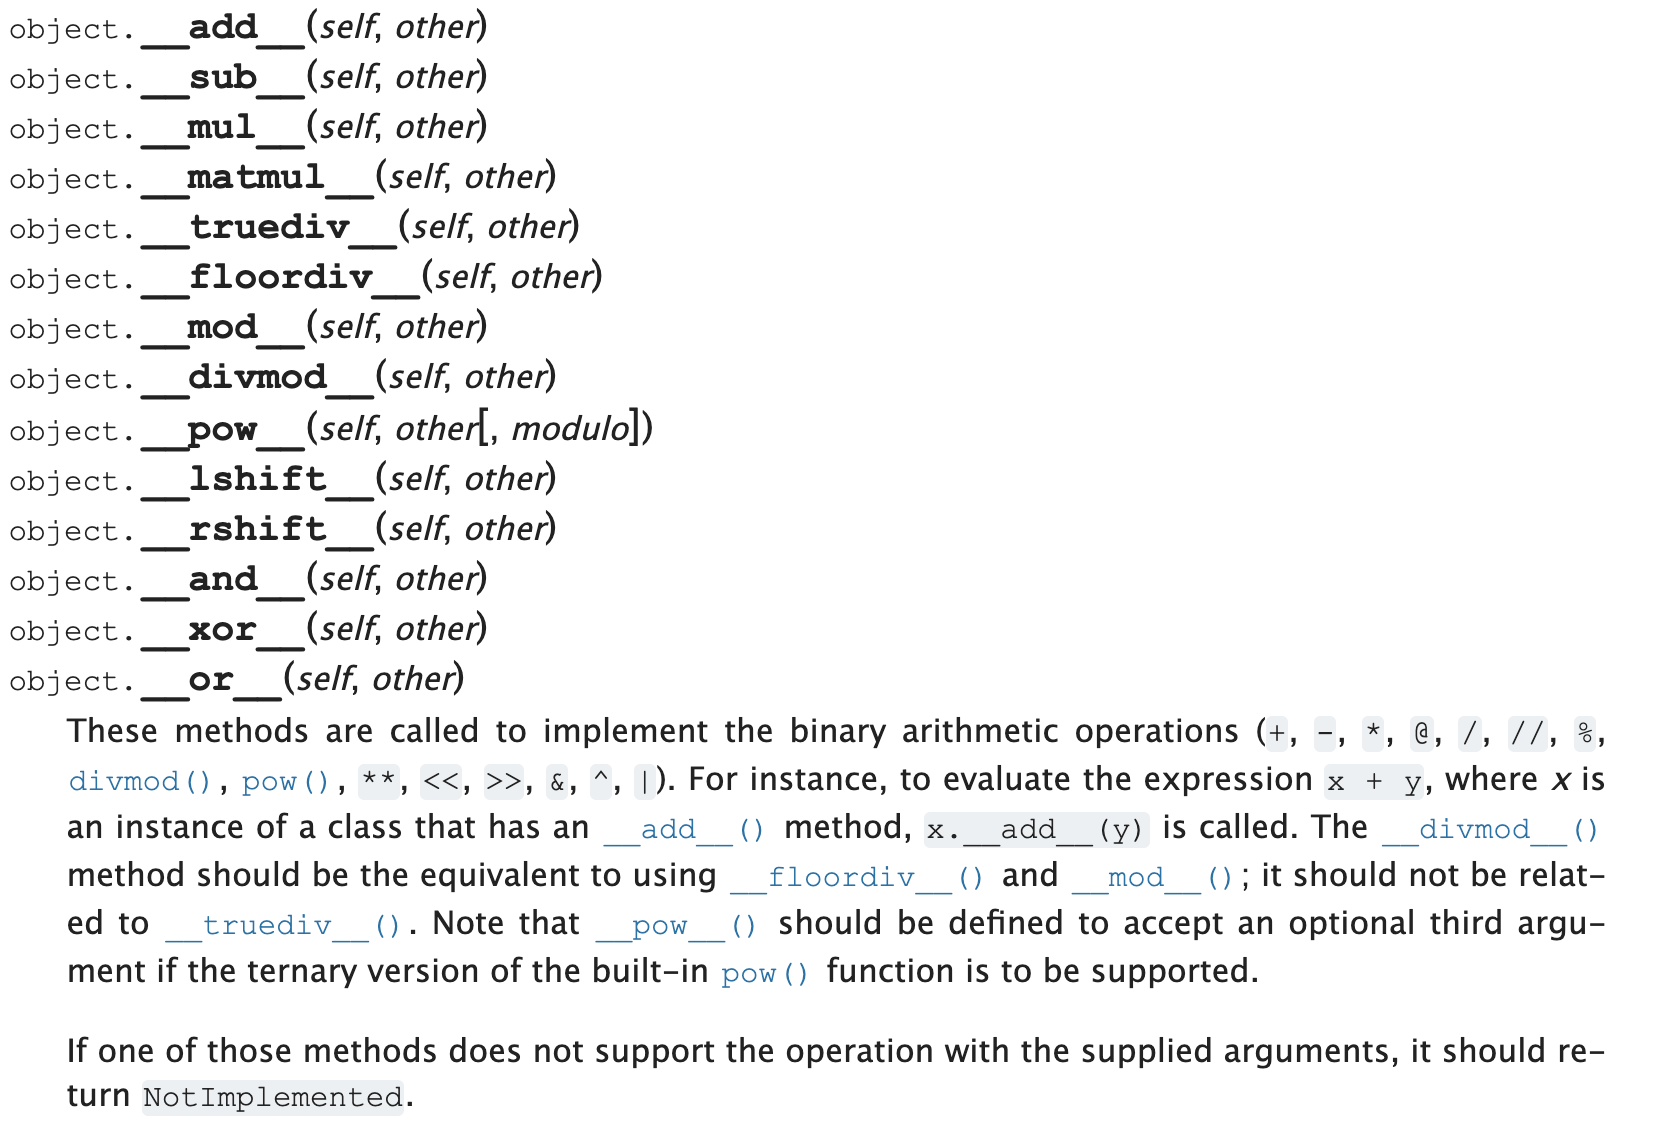

## Ещё почитать

* про исключения: https://docs.python.org/3/tutorial/errors.html
* про `with`: https://docs.python.org/3/reference/datamodel.html#with-statement-context-managers
* про генераторы: https://habr.com/ru/post/132554/
* iterators vs generators: https://nvie.com/posts/iterators-vs-generators/
* встроенная функция `zip`: https://www.w3schools.com/python/ref_func_zip.asp
* `itertools` - полезные функции для работы с итераторами: https://medium.com/@jasonrigden/a-guide-to-python-itertools-82e5a306cdf8